[//]: <> (This is how you insert comments)
[//]: <> (This is a markdown cell with text centered)

<div align="center"> 

# R, Programming assignment

## Simulating pathways, mutual exclusivity, et al.

### Authors:
    
### Raquel Blanco Martínez-Illescas, Daniel Peñas Utrilla, Henry Secaira Morocho
        
### Bioinformatics and Computational Biology, UAM
    
### 27/01/2021
    
<img src="Figures/UAM_logo.png" style="width:150px; height: 100px" align="center"/>

# Introduction

## Cancer Progression Models

Cancer is an **heterogeneous disease** caused by the continuous accumulation of somatic mutations during lifetime of an individual. 

<img src="Figures/tumor-heterogeneity.png" 
     style="width:350px; height: 150px"
     align="center"/>

Somatic mutations that affect the cells are divided in:

- **Passenger mutations** --> Silent mutations
- **Driver mutations** --> Lead to cancer progression

<img src="Figures/Passenger_driver.jpg"
      style="width:400px; height: 250px" 
      align="center"/>


## Cancer Progression Models

Tumor samples are obtained as **cross-sectional** samples --> single-time snapshots from tumors

<img src="Figures/fotografo.jpg"
     style="width:400px; height: 250px" 
     align="center"/>

## Evolutionary Models

* Order of restrictions are encoded in DAGs

* Mutations occur only if the preceding parent mutations have occurred (**monotonicity**)


<table><tr>
<td> 
  <p align="center" style="padding: 20px">
    <img src="Figures/DAG_restrictions.png" width="320">
    <br>
  </p> 
</td>
<td> 
  <p align="center">
    <img src="Figures/DAG_genotypes.png" width="150">
    <br>
  </p> 
</td>
</tr></table>

[Diaz-Uriarte, R. (2018)](https://doi.org/10.1093/bioinformatics/btx663)

## Evolutionary Models (cont.)

* Genotypes can follow different paths during disease progression

* Evolutionary tumor progression models allows **deviations from monotonicity**


<img src="Figures/DAG_genotypes_deviations.png"
     style="width:200px; height: 350px"
     align ="center"/>
     
[Diaz-Uriarte, R. (2018)](https://doi.org/10.1093/bioinformatics/btx663)

## Evolutionary Models (cont.)

* Fitness landscapes can be used to:
    * Visualize the possible paths of tumor progression
    * Identify genes that block those paths

<table><tr>
<td> 
  <p align="center" style="padding: 20px">
    <img src="Figures/DAG_genotypes.png" width="150">
    <br>
  </p> 
</td>
<td> 
  <p align="center">
    <img src="Figures/Fitness_landscape.png" width="250">
    <br>
  </p> 
</td>
</tr></table>

[Diaz-Uriarte, R. (2018)](https://doi.org/10.1093/bioinformatics/btx663)

## Order of effects

* The order in which somatic mutations are acquired influence clonal evolution

    * Mutations can behave as driver or passenger depending on the genetic context
    
* Therefore, the **fitness a mutations depends in which mutations were acquired previously**

<table><tr>
<td> 
  <p align="center" style="padding: 20px">
    <img src="Figures/Order_effects.png" width="250">
    <br>
  </p> 
</td>
<td> 
  <p align="center">
    <img src="Figures/Order_effects2.png" width="250">
    <br>
  </p> 
</td>
</tr></table>

## Epistatic interactions

* Cancer progression is driven by the accumulation of somatic mutations that interact epistatically

* This is, their **effect is non-additive to the tumor fitness as a phenotype**


<img src="Figures/Epistasis.png"
     style="width:420px; height: 350px" align="center"/>

## Synthtetic Viability

* The combination of two mutations that rescue the lethal effects of a each single mutation

## Mutual Exclusivity 

* Common in cancer progresion: **pathways**

<img src="Figures/Mutually_exclusive.png"
     style="width:400px; height: 310px" align="center"/>

* **Null effect:** a mutation that occurs first produces the most selective advantage

## Mutual Exclusivity (cont.)

* **Synthetic lethality:** combination of two mutations is detrimental for the viability of the cell, whereas each mutation is not


<table><tr>
<td> 
  <p align="center" style="padding: 20px">
    <img src="Figures/fit_lands_smooth.png" width="400">
    <br>
  </p> 
</td>
<td> 
  <p align="center">
    <img src="Figures/fit_lands_rug.png" width="400">
    <br>
  </p> 
</td>
</tr></table>

[Van Cleve, J., & Weissman, D. B. (2015)](https://doi.org/10.1073/pnas.1507916112)

## Frequency-dependent fitness

- Coexistance of multiple clones in time

- **Evolutionary game theory**

- Fitness is actually a function of the relative frequency of other clones

<img src="Figures/freq-dep.png"
     style="width:800px; height: 450px" 
     align="center"/>

## PathTiMEx, a generative probabilistic graphical model of cancer progression.


PathTiMex is a **probabilistic model** of tumor progression among mutually exclusive driver pathways. This model was used to infer cancer progression in colorectal cancer.

<img src="Figures\pathTiMEx.png"
     style="width:600px; height: 450px" 
     align="center"/>
     
This **generative model** is mapped into an **evolutionary model**, where deviations from monotonicity are allowed.

In [1]:
## First, it is necessary to load OncoSimulR package
library(OncoSimulR)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


## Model

In [3]:
## Restriction table (extended version of the poset)
colcancer <- data.frame(
                 parent = c(rep("Root",3), "A", "B", "C"), ## Parent nodes
                 child = c("A", "B", "D", "C", "E", "E"), ## Child nodes
                 s = c(0.5, 0.2, 0.05, 0.1, rep(0.05, 2)), ## Restrictions are satisfied
                 sh = -0.3, ## Deviations from monotonicity (penalization)
                 typeDep = "MN" ## Type of dependency 
                  )
## Fitness specification of the poset
colcancer_efec <- allFitnessEffects(
                  colcancer, # Poset
                  geneToModule = c( ## Specification of the modules
                               "Root" = "Root", 
                               "A" = "APC",
                               "B" = "TP53, EVC2",
                               "C" = "KRAS",
                               "D" = "PI3KCA, EPHA",
                               "E" = "FBXW7, TCF7L2"),
                  drvNames = c( ## Specification of drivers
                               "APC", "TP53", "EVC2", "KRAS",
                               "PI3KCA", "EPHA", "FBXW7", "TCF7L2"))

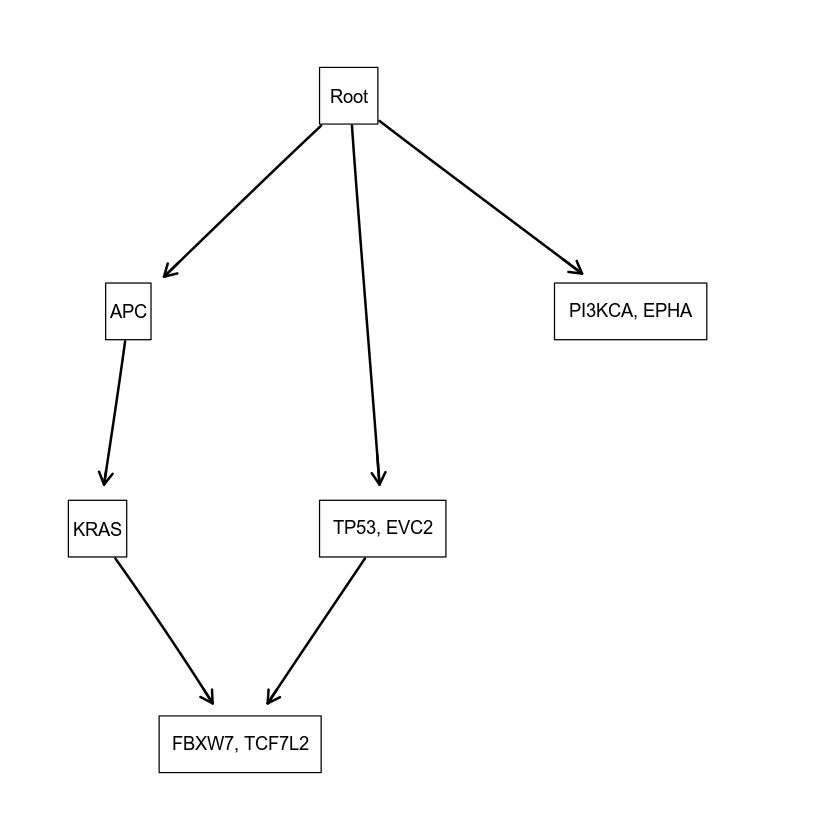

In [3]:
## DAG representation
plot(colcancer_efec, expandModules = TRUE, autofit = TRUE, lwdf = 2)

## Map Genotypes to Fitness

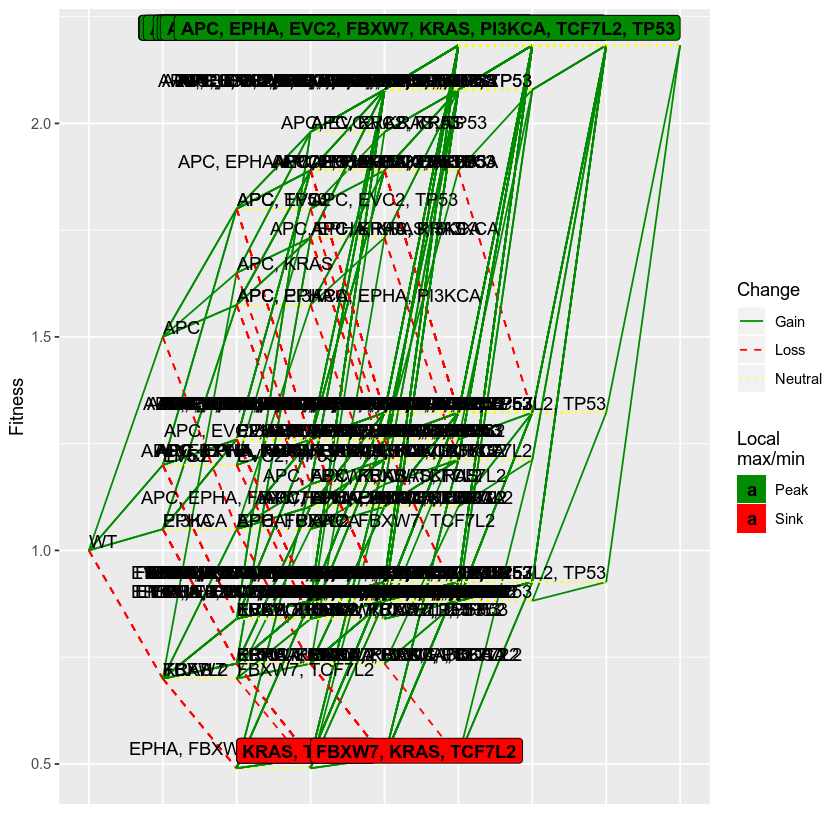

In [8]:
# Evalutation of all genotypes and its fitness
colcancer_efec_FL <- evalAllGenotypes(colcancer_efec, max = 110000)
## Output is not shown due to size of the table.

## Plot of fitness landscape
plotFitnessLandscape(colcancer_efec_FL)

## Simplified Model

In [4]:
## Fitness specification of the simplified poset
Scolcancer <- allFitnessEffects(colcancer,                
                  geneToModule = c( ## Specification of the modules
                               "Root" = "Root", 
                               "A" = "APC",
                               "B" = "TP53",
                               "C" = "KRAS",
                               "D" = "PI3KCA",
                               "E" = "FBXW7"),
                  
                  drvNames = c( ## Specification of drivers
                               "APC", "TP53", "KRAS",
                               "PI3KCA", "FBXW7")
                  )

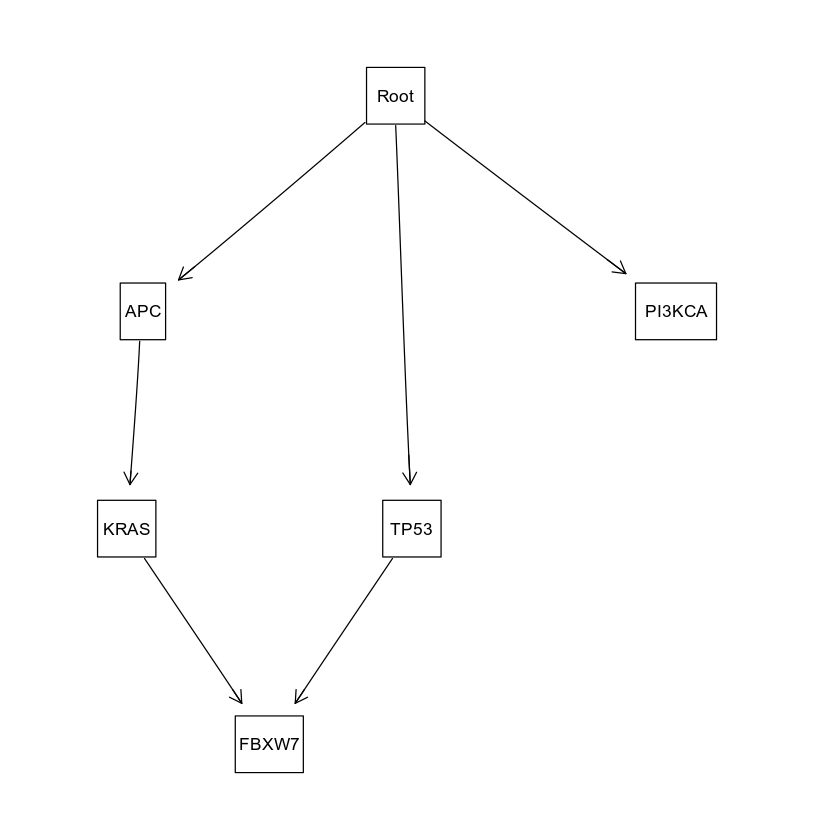

In [5]:
## DAG 
plot(Scolcancer, expandModules = TRUE, autofit = TRUE)

## Map genotypes to Fitness

In [6]:
## Obtain all genotypes from the fitnessEffect
(Scolcancer_ge <- evalAllGenotypes(Scolcancer, addwt = TRUE))

Genotype,Fitness
WT,"1,00000"
APC,"1,50000"
FBXW7,"0,70000"
KRAS,"0,70000"
PI3KCA,"1,05000"
TP53,"1,20000"
"APC, FBXW7","1,05000"
"APC, KRAS","1,65000"
"APC, PI3KCA","1,57500"
"APC, TP53","1,80000"


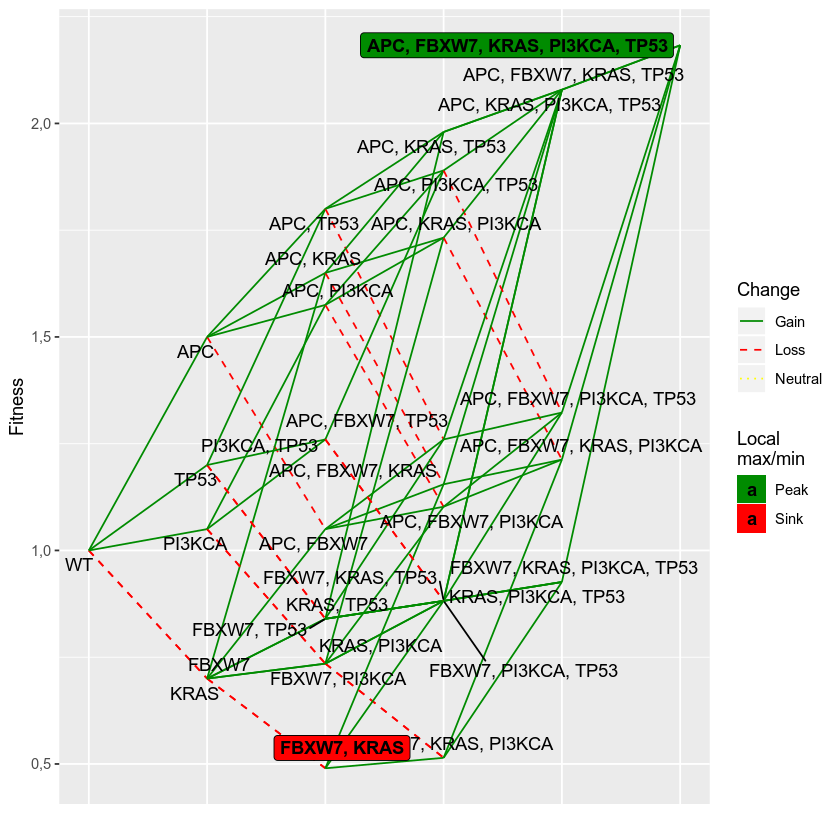

In [7]:
## Fitness landscape of simplified model
plotFitnessLandscape(Scolcancer_ge,
                     use_ggrepel = TRUE)

## Order Effects in cancer progression

Simplified model with 4 genes: APC, TP53, FBXW7 and KRAS. 

In [2]:
## Restriction table 
cc <- data.frame(parent = c(rep("Root", 2), "A", "B", "C"),
                 child = c("A", "C", "B", "D", "D"),
                 s = c(0.5, 0.2, 0.1, rep(0.05,2)),
                 sh = -0.3,
                 typeDep = "MN")
## Fitness effects
cc_visuali <- allFitnessEffects(cc,
                                  geneToModule =
    c("Root" = "Root",
      "A" = "APC",
      "B" = "KRAS",
      "C" = "TP53",
      "D" = "FBXW7") )

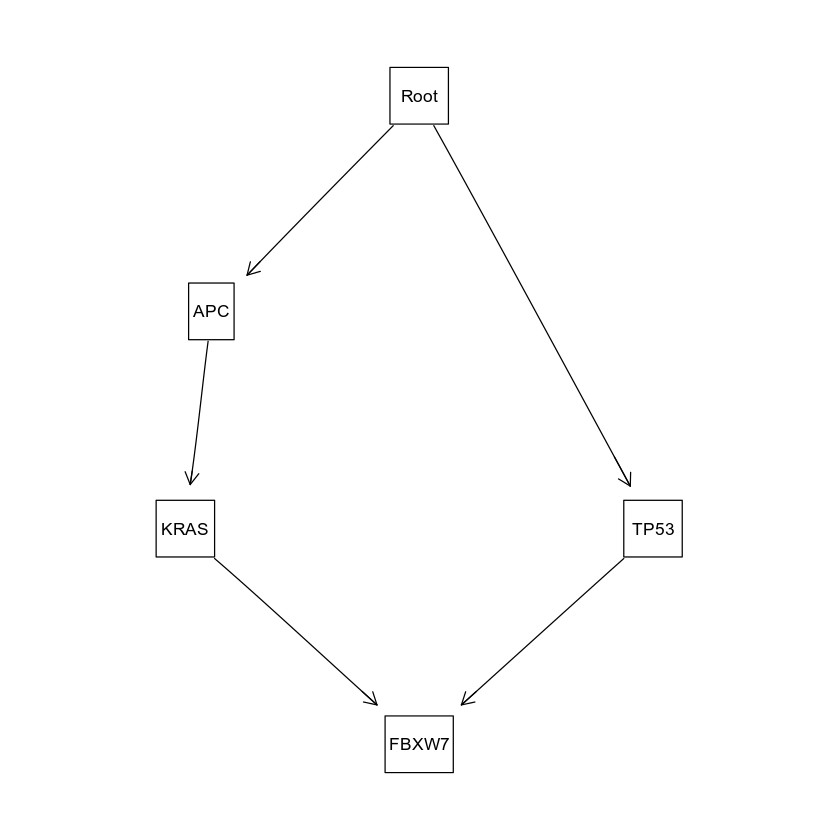

In [3]:
# DAG from the simplified model
plot(cc_visuali, expandModules = TRUE, autofit = TRUE)

Mutation's order is inferred with pathTiMEx through the **waiting time rate parameter**. It informs about the mutation's arise. Fitness value associated to each order is derived from this parameter.


| Gene/module | Waiting time rate parameter  |
| :-----------: | :-------------------------------------: |
|      APC      |                  9.5                    |
|               |                                         |
|     KRAS      |                  2.89                   |
|               |                                         |
|  TP53, EVC2   |                  1.92                   |
|               |                                         |
| PIK3CA, EPHA3 |                  0.17                   |
|               |                                         |
| FBXW7, TCF7L2 |                  0.08                   |



The order in mutations: **APC > TP53 > KRAS > FBWX7** is consistent with restrictions and is associated to the highest fitness value. Different order deviates from monotoniciy and lower fitness is associated.


In [4]:
## Order effects
cc_order <- allFitnessEffects(
  orderEffects = c("A > B > C > D" = 0.5, 
                   "B > A > C > D" = 0.2,
                   "B > C > A > D" = 0.1,
                   "B > C > D > A" = 0.05,
                   "A > C" = 0.2,
                   "C > A" = 0.05,
                   "D > A" = 0.05,
                   "A > D" = 0.2,
                   "B > D" = 0.2,
                   "C > D" = 0.2,
                   "B > C" = 0.2,
                   "C > B" = 0.1,
                   "B > A" = 0.1,
                   "A > B" = 0.3),

  geneToModule =
    c("A" = "APC",
      "B" = "KRAS",
      "C" = "TP53",
      "D" = "FBWX7") )

## Map Genotypes to Fitness

In [5]:
## Fitness associated to each genotype
(cc_order_geno <- evalAllGenotypes(cc_order, order = TRUE))


Genotype,Fitness
APC,"1,0000"
FBWX7,"1,0000"
KRAS,"1,0000"
TP53,"1,0000"
APC > FBWX7,"1,2000"
APC > KRAS,"1,3000"
APC > TP53,"1,2000"
FBWX7 > APC,"1,0500"
FBWX7 > KRAS,"1,0000"
FBWX7 > TP53,"1,0000"


In [6]:
#DAG
plot(cc_order)

ERROR: Error in `*tmp*`[[i]]: subscript out of bounds


In [7]:
# Fitness landscape
plotFitnessLandscape(cc_order_geno)

ERROR: Error in to_Fitness_Matrix(x, max_num_genotypes = max_num_genotypes): We cannot deal with order effects yet.


## Pathway Linear Progression Model

* Generative probabilistic model 

* The order in which mutations arise are better described at the **pathway level** instead of a gene level

* Model mapped the progression model from colorectal cancer data

<img src="Figures/PLPM.png"
     style="width:300px; height: 250px" />

[Raphael, B. J., & Vandin, F. (2015)](https://doi.org/10.1089/cmb.2014.0161)

## Model

In [5]:
## Define poset restrictions, mapping of genes to modules, and driver genes
(CRC_W <- allFitnessEffects(data.frame(parent = c("Root", "A", "B", "C"),
                                      child = c("A", "B", "C", "D"),
                                      s = c(0.6, 0.4, 0.1, 0.05),
                                      sh = -0.5,
                                      typeDep = "MN"), 
                           geneToModule = c("Root" = "Root",
                                            "A" = "APC, EPHA3, TCF7L2",
                                            "B" = "EVC2, PIK3CA, TP53", 
                                            "C" = "KRAS",
                                            "D" = "FBXW7"),
                           drvNames = c("APC", "EPHA3", "TCF7L2", "EVC2", "PIK3CA", 
                                        "TP53", "KRAS", "FBXW7")))

$long.rt
$long.rt$A
$long.rt$A$child
[1] "A"

$long.rt$A$s
[1] 0.6

$long.rt$A$sh
[1] -0.5

$long.rt$A$typeDep
        MN 
"monotone" 

$long.rt$A$parents
[1] "Root"

$long.rt$A$childNumID
A 
1 

$long.rt$A$parentsNumID
Root 
   0 


$long.rt$B
$long.rt$B$child
[1] "B"

$long.rt$B$s
[1] 0.4

$long.rt$B$sh
[1] -0.5

$long.rt$B$typeDep
        MN 
"monotone" 

$long.rt$B$parents
[1] "A"

$long.rt$B$childNumID
B 
2 

$long.rt$B$parentsNumID
A 
1 


$long.rt$C
$long.rt$C$child
[1] "C"

$long.rt$C$s
[1] 0.1

$long.rt$C$sh
[1] -0.5

$long.rt$C$typeDep
        MN 
"monotone" 

$long.rt$C$parents
[1] "B"

$long.rt$C$childNumID
C 
3 

$long.rt$C$parentsNumID
B 
2 


$long.rt$D
$long.rt$D$child
[1] "D"

$long.rt$D$s
[1] 0.05

$long.rt$D$sh
[1] -0.5

$long.rt$D$typeDep
        MN 
"monotone" 

$long.rt$D$parents
[1] "C"

$long.rt$D$childNumID
D 
4 

$long.rt$D$parentsNumID
C 
3 



$long.epistasis
list()

$long.orderEffects
list()

$long.geneNoInt
data frame with 0 columns and 0 rows

$geneModule

## DAG

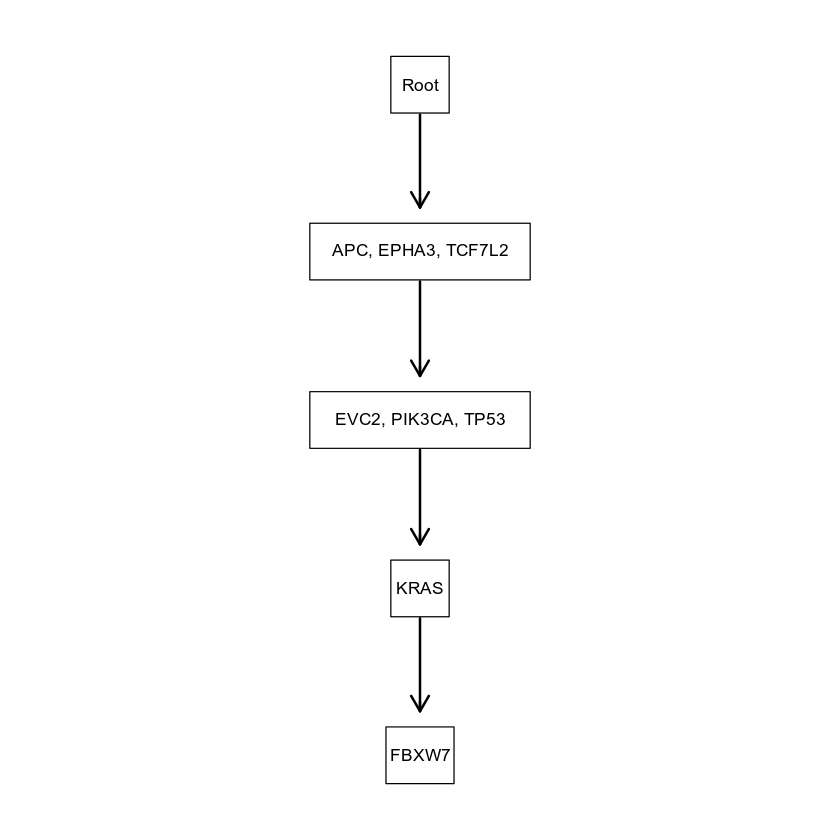

In [6]:
# DAG representation
plot(CRC_W, expandModules = TRUE, autofit = TRUE, lwdf = 2)

## Map Genotypes to Fitness

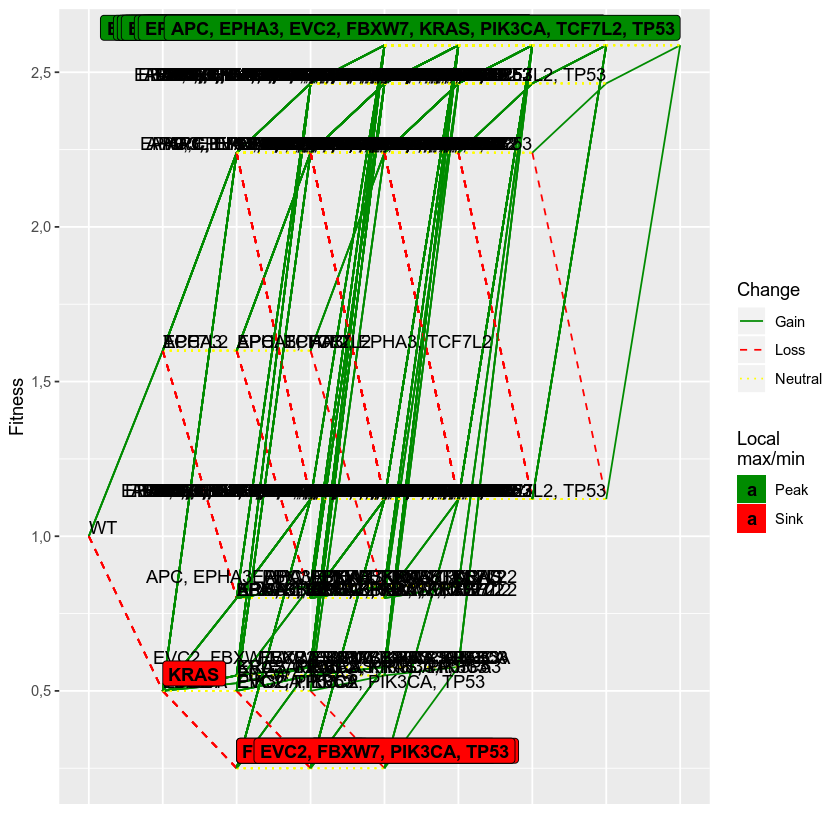

In [7]:
## Map genotypes to fitness
CRC_F <- evalAllGenotypes(CRC_W, order = FALSE, addwt = TRUE)

## Plot of fitness landscape

plot(CRC_F)

## Simplified model

In [2]:
## Simplified model
## Define poset restrictions, mapping of genes to modules, and driver genes
(CRC_W2 <- allFitnessEffects(data.frame(parent = c(rep("Root", 2), "A", "B", "C"),
                                      child = c("A", "B", rep("C", 2), "D"),
                                      s = c(0.2, 0.1, rep(0.05, 2), 0.01),
                                      sh = -0.5,
                                      typeDep = c(rep("XMPN", 4), "MN")), 
                           geneToModule = c("Root" = "Root",
                                            "A" = "APC",
                                            "B" = "TP53", 
                                            "C" = "KRAS",
                                            "D" = "FBXW7"),
                           drvNames = c("APC", "TP53", "KRAS", "FBXW7")))

$long.rt
$long.rt$A
$long.rt$A$child
[1] "A"

$long.rt$A$s
[1] 0.2

$long.rt$A$sh
[1] -0.5

$long.rt$A$typeDep
  XMPN 
"xmpn" 

$long.rt$A$parents
[1] "Root"

$long.rt$A$childNumID
A 
1 

$long.rt$A$parentsNumID
Root 
   0 


$long.rt$B
$long.rt$B$child
[1] "B"

$long.rt$B$s
[1] 0.1

$long.rt$B$sh
[1] -0.5

$long.rt$B$typeDep
  XMPN 
"xmpn" 

$long.rt$B$parents
[1] "Root"

$long.rt$B$childNumID
B 
2 

$long.rt$B$parentsNumID
Root 
   0 


$long.rt$C
$long.rt$C$child
[1] "C"

$long.rt$C$s
[1] 0.05

$long.rt$C$sh
[1] -0.5

$long.rt$C$typeDep
  XMPN 
"xmpn" 

$long.rt$C$parents
[1] "A" "B"

$long.rt$C$childNumID
C 
3 

$long.rt$C$parentsNumID
A B 
1 2 


$long.rt$D
$long.rt$D$child
[1] "D"

$long.rt$D$s
[1] 0.01

$long.rt$D$sh
[1] -0.5

$long.rt$D$typeDep
        MN 
"monotone" 

$long.rt$D$parents
[1] "C"

$long.rt$D$childNumID
D 
4 

$long.rt$D$parentsNumID
C 
3 



$long.epistasis
list()

$long.orderEffects
list()

$long.geneNoInt
data frame with 0 columns and 0 rows

$geneModule
   Ge

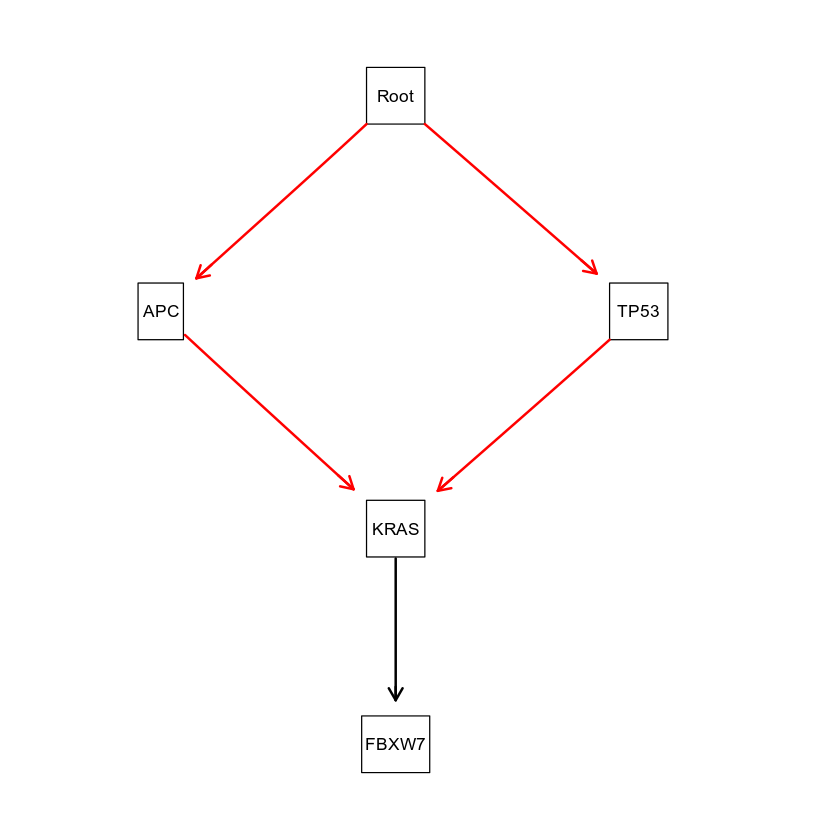

In [3]:
# DAG representation
plot(CRC_W2, expandModules = TRUE, autofit = TRUE, lwdf = 2)

## Map Genotypes to Fitness

In [4]:
## Simplified Model
## Map genotypes to fitness
(CRC_F2 <- evalAllGenotypes(CRC_W2, order = FALSE, addwt = TRUE))

Genotype,Fitness
WT,"1,00000"
APC,"1,20000"
FBXW7,"0,50000"
KRAS,"0,50000"
TP53,"1,10000"
"APC, FBXW7","0,60000"
"APC, KRAS","1,26000"
"APC, TP53","1,32000"
"FBXW7, KRAS","0,50500"
"FBXW7, TP53","0,55000"


## Map Genotypes to Fitness (cont.)

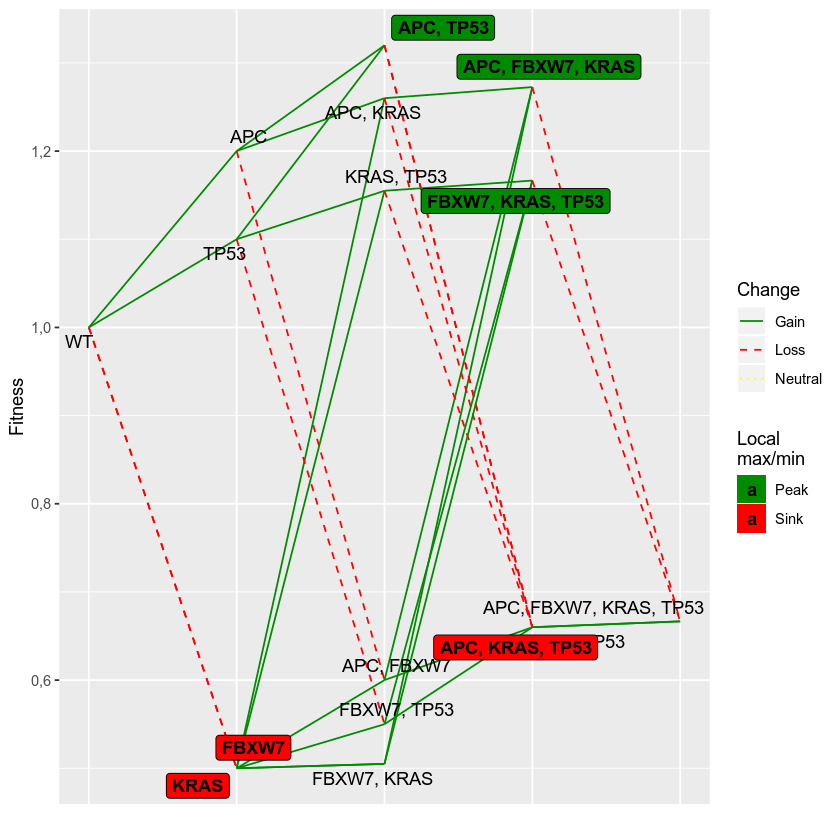

In [5]:
## Plot of fitness landscape

plot(CRC_F2, use_ggrepel = TRUE)

## Synthetic Lethality via Three-way Interaction  

* Restrictions imposed with `XOR`

* Fitness values that reflect slightly deleterious effect (if two genes appear)

* or a highly deleterious effect (if three genes appear).

In [2]:
## Simplified model
## Define poset restrictions, mapping of genes to modules, and driver genes
(CRC_W4 <- allFitnessEffects(data.frame(parent = c(rep("Root", 2), "A", "B", "C"),
                                      child = c("A", "B", rep("C", 2), "D"),
                                      s = c(0.2, 0.1, rep(0.05, 2), 0.01),
                                      sh = -0.5,
                                      typeDep = c(rep("XMPN", 4), "MN")), 
                            epistasis = c("A : -B : -C" = 0.2,
                                          "-A : B : -C" = 0.1,
                                          "-A : -B : C" = 0.05,
                                          "A : B : -C" = 0.01,
                                          "-A : B : C" = 0.02,
                                          "-B : A : C" = 0.02,
                                          "A : B : C" = -0.5),
                           geneToModule = c("Root" = "Root",
                                            "A" = "APC",
                                            "B" = "TP53", 
                                            "C" = "KRAS",
                                            "D" = "FBXW7"),
                           drvNames = c("APC", "TP53", "KRAS", "FBXW7")))

$long.rt
$long.rt$A
$long.rt$A$child
[1] "A"

$long.rt$A$s
[1] 0.2

$long.rt$A$sh
[1] -0.5

$long.rt$A$typeDep
  XMPN 
"xmpn" 

$long.rt$A$parents
[1] "Root"

$long.rt$A$childNumID
A 
1 

$long.rt$A$parentsNumID
Root 
   0 


$long.rt$B
$long.rt$B$child
[1] "B"

$long.rt$B$s
[1] 0.1

$long.rt$B$sh
[1] -0.5

$long.rt$B$typeDep
  XMPN 
"xmpn" 

$long.rt$B$parents
[1] "Root"

$long.rt$B$childNumID
B 
2 

$long.rt$B$parentsNumID
Root 
   0 


$long.rt$C
$long.rt$C$child
[1] "C"

$long.rt$C$s
[1] 0.05

$long.rt$C$sh
[1] -0.5

$long.rt$C$typeDep
  XMPN 
"xmpn" 

$long.rt$C$parents
[1] "A" "B"

$long.rt$C$childNumID
C 
3 

$long.rt$C$parentsNumID
A B 
1 2 


$long.rt$D
$long.rt$D$child
[1] "D"

$long.rt$D$s
[1] 0.01

$long.rt$D$sh
[1] -0.5

$long.rt$D$typeDep
        MN 
"monotone" 

$long.rt$D$parents
[1] "C"

$long.rt$D$childNumID
D 
4 

$long.rt$D$parentsNumID
C 
3 



$long.epistasis
$long.epistasis[[1]]
$long.epistasis[[1]]$ids
[1] "-C" "-B" "A" 

$long.epistasis[[1]]$s
[1] 0.2

$long.ep

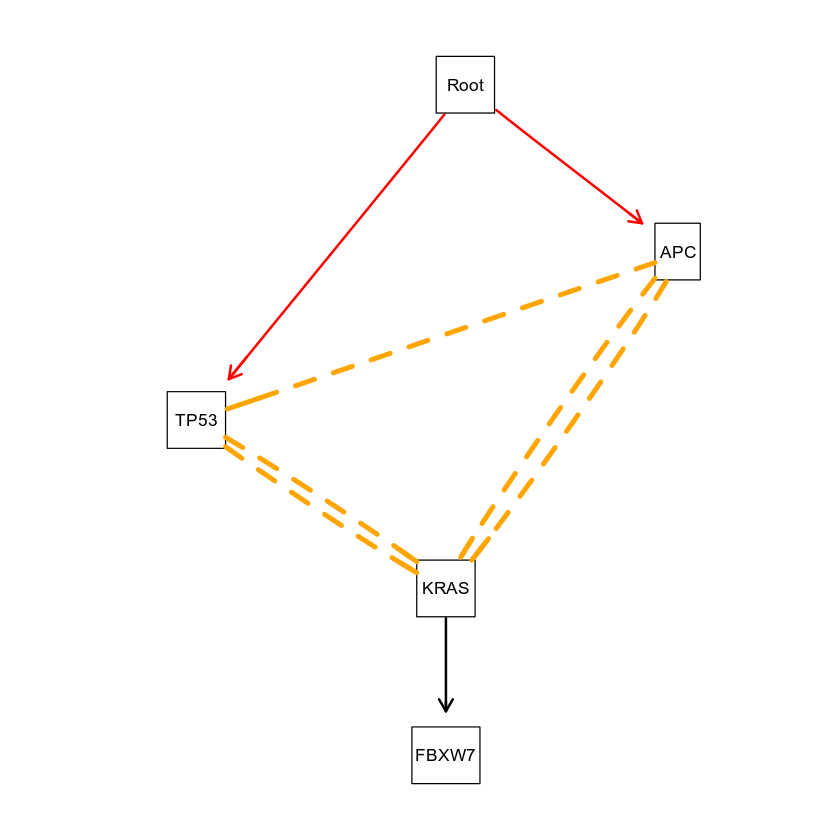

In [3]:
# DAG representation
plot(CRC_W4, expandModules = TRUE, autofit = TRUE, lwdf = 2)

## Map Genotypes to Fitness

In [4]:
## Map genotypes to fitness
CRC_F2 <- evalAllGenotypes(CRC_W4, order = FALSE, addwt = TRUE)

(CRC_F2) 

Genotype,Fitness
WT,"1,000000"
APC,"1,440000"
FBXW7,"0,500000"
KRAS,"0,525000"
TP53,"1,210000"
"APC, FBXW7","0,720000"
"APC, KRAS","1,285200"
"APC, TP53","1,333200"
"FBXW7, KRAS","0,530250"
"FBXW7, TP53","0,605000"


## Map Genotypes to Fitness (cont.)

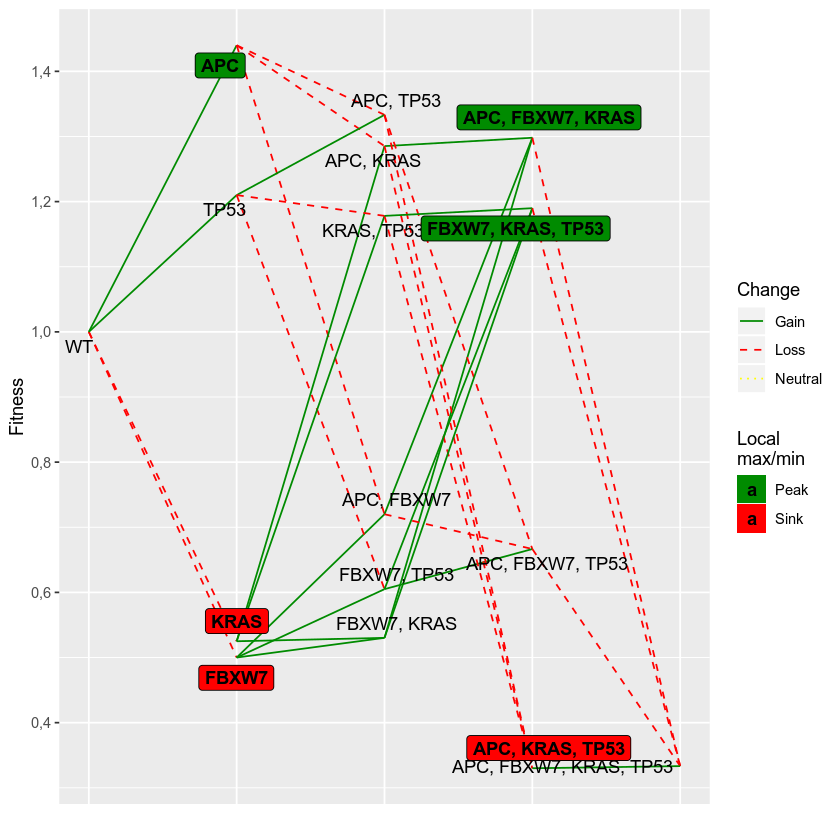

In [5]:
## Plot of fitness landscape

plot(CRC_F2, use_ggrepel = TRUE)

## Synthetic Viability with a Three-way Interaction

* Highly deleterious effects if APC, TP53, or KRAS appear independently

* Slightly deleterious effects were set if two of those genes appear in a genotype

* Benefitial effect for the genotype of the three genes

* Restrictions imposed with `SM`

In [2]:
## Simplified model
## SM because synthetic viability requires both parent nodes. 
## Define poset restrictions, mapping of genes to modules, and driver genes
(CRC_W6 <- allFitnessEffects(data.frame(parent = c(rep("Root", 2), "A", "B", "C"),
                                      child = c("A", "B", rep("C", 2), "D"),
                                      s = c(0.2, 0.1, rep(0.05, 2), 0.01),
                                      sh = -0.5,
                                      typeDep = c(rep("MN", 5))), 
                            epistasis = c("A : -B : -C" = -0.2,
                                          "-A : B : -C" = -0.2,
                                          "-A : -B : C" = -0.3,
                                          "A : B : -C" = -0.05,
                                          "-A : B : C" = -0.01,
                                          "A : -B : C" = -0.01,
                                          "A : B : C" = 0.5),
                           geneToModule = c("Root" = "Root",
                                            "A" = "APC",
                                            "B" = "TP53", 
                                            "C" = "KRAS",
                                            "D" = "FBXW7"),
                           drvNames = c("APC", "TP53", "KRAS", "FBXW7")))


$long.rt
$long.rt$A
$long.rt$A$child
[1] "A"

$long.rt$A$s
[1] 0.2

$long.rt$A$sh
[1] -0.5

$long.rt$A$typeDep
        MN 
"monotone" 

$long.rt$A$parents
[1] "Root"

$long.rt$A$childNumID
A 
1 

$long.rt$A$parentsNumID
Root 
   0 


$long.rt$B
$long.rt$B$child
[1] "B"

$long.rt$B$s
[1] 0.1

$long.rt$B$sh
[1] -0.5

$long.rt$B$typeDep
        MN 
"monotone" 

$long.rt$B$parents
[1] "Root"

$long.rt$B$childNumID
B 
2 

$long.rt$B$parentsNumID
Root 
   0 


$long.rt$C
$long.rt$C$child
[1] "C"

$long.rt$C$s
[1] 0.05

$long.rt$C$sh
[1] -0.5

$long.rt$C$typeDep
        MN 
"monotone" 

$long.rt$C$parents
[1] "A" "B"

$long.rt$C$childNumID
C 
3 

$long.rt$C$parentsNumID
A B 
1 2 


$long.rt$D
$long.rt$D$child
[1] "D"

$long.rt$D$s
[1] 0.01

$long.rt$D$sh
[1] -0.5

$long.rt$D$typeDep
        MN 
"monotone" 

$long.rt$D$parents
[1] "C"

$long.rt$D$childNumID
D 
4 

$long.rt$D$parentsNumID
C 
3 



$long.epistasis
$long.epistasis[[1]]
$long.epistasis[[1]]$ids
[1] "-C" "-B" "A" 

$long.epistasis[

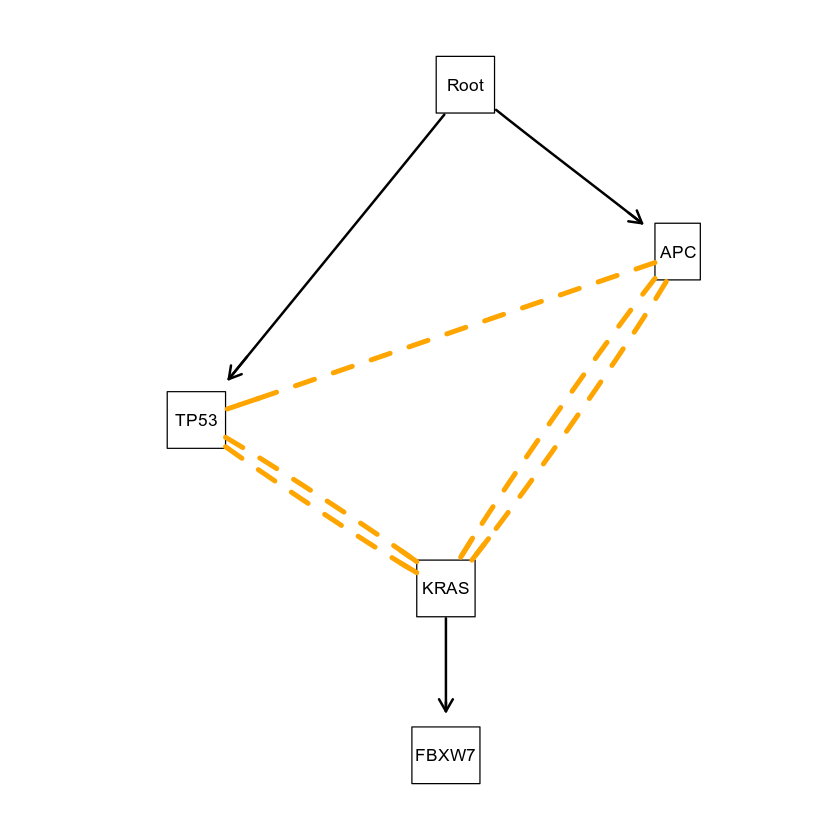

In [3]:
# DAG representation
plot(CRC_W6, expandModules = TRUE, autofit = TRUE, lwdf = 2)

## Map Genotypes to Fitness

In [4]:
## Map genotypes to fitness
CRC_F4 <- evalAllGenotypes(CRC_W6, order = FALSE, addwt = TRUE)
(CRC_F4)

Genotype,Fitness
WT,"1,000000"
APC,"0,960000"
FBXW7,"0,500000"
KRAS,"0,350000"
TP53,"0,880000"
"APC, FBXW7","0,480000"
"APC, KRAS","0,594000"
"APC, TP53","1,254000"
"FBXW7, KRAS","0,353500"
"FBXW7, TP53","0,440000"


## Map Genotypes to Fitness (cont.)

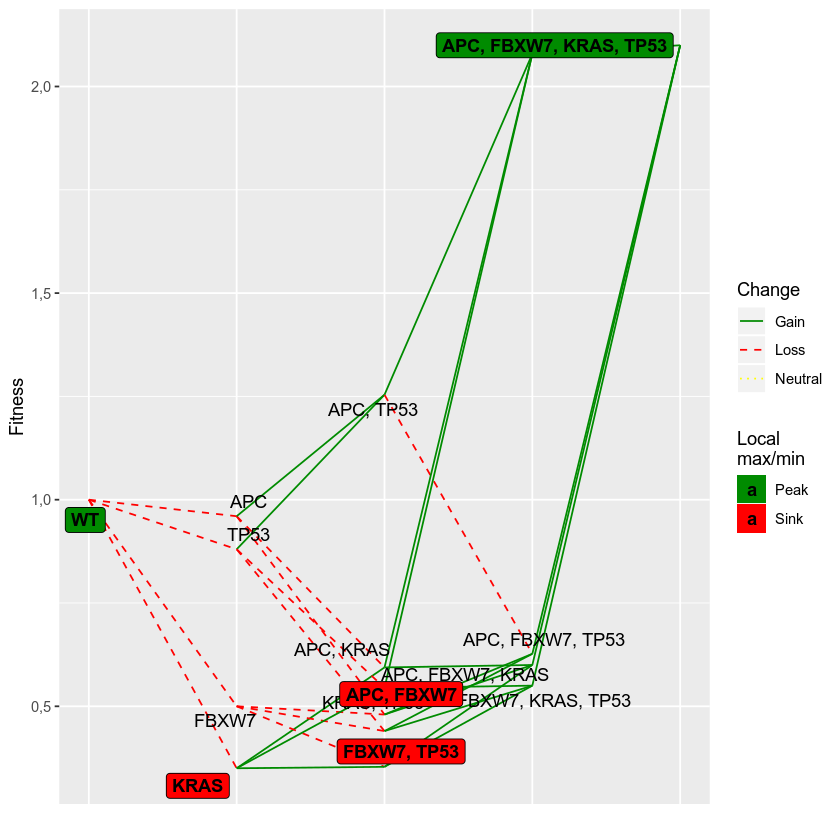

In [6]:
## Plot of fitness landscape

plot(CRC_F4, use_ggrepel = TRUE)

## A Probabilistic Model of Mutually Exclusive Linearly Ordered Driver Pathways (Mohaghegh Neyshabouri et al.)


This model assumes driver genes are over-represented among those mutated across a large tumor collection and, thus, they can be identified in terms of frequency. Also, those participating of the same pathway are mutated in a **mutually exclusive manner** because more than one mutation in a pathway does not give any selective advantage to the clone. analyze one large dataset of colorectal adenocarcinoma (COADREAD) from IntOGen-mutations database.

<img src="Figures/COADREAD.png"
     style="width:350px; height: 500px" 
     align="center"/>
     
This **generative model** is mapped into an **evolutionary model**, where deviations from monotonicity are allowed and gene modules maintained.

In [ ]:
options(repr.plot.width = 14, repr.plot.height = 7, repr.plot.res = 500)

## Model

In [2]:
## Restriction table, including DAG of restrictions specifications and associated fitness
COADREAD_rT <- data.frame(
              parent = c("Root", "A", "B", "C", "D", "E", "F"), # Parent nodes
              child = c("A", "B", "C", "D", "E", "F", "G"), # Child nodes
                             s = 0.5, 
                             sh = c(rep(-1, 4), rep(-.5, 2), -.2),
                             typeDep = "MN")


## Create fitness specifications from DAG of restrictions considering modules 
COADREAD_fitness <- allFitnessEffects(
              COADREAD_rT, 
              geneToModule = c( 
                 "Root" = "Root",
                 "A" = "APC",
                 "B" = "TP53",
                 "C" = "KRAS",
                 "D" = "PIK3CA, NRAS",
                 "E" = "FBXW7, ARID1A",
                 "F" = "ATM, SMAD2",
                 "G" = "SOX9, SMAD4")) # Modules


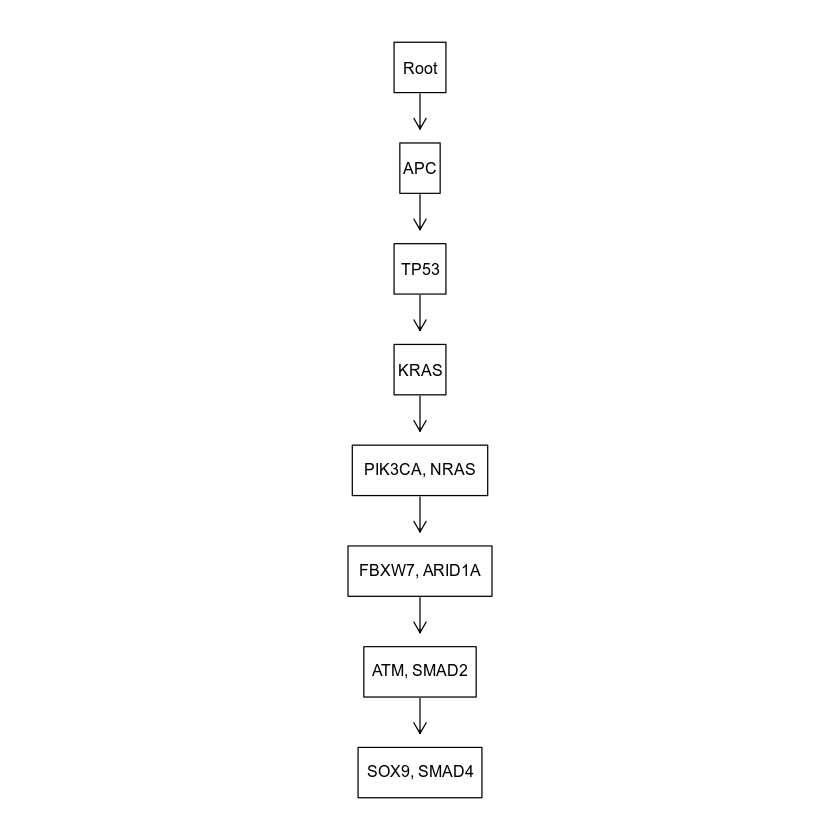

In [3]:
## DAG of restrictions representation
plot(COADREAD_fitness, expandModules = TRUE, autofit = TRUE)

## Map Genotypes to Fitness

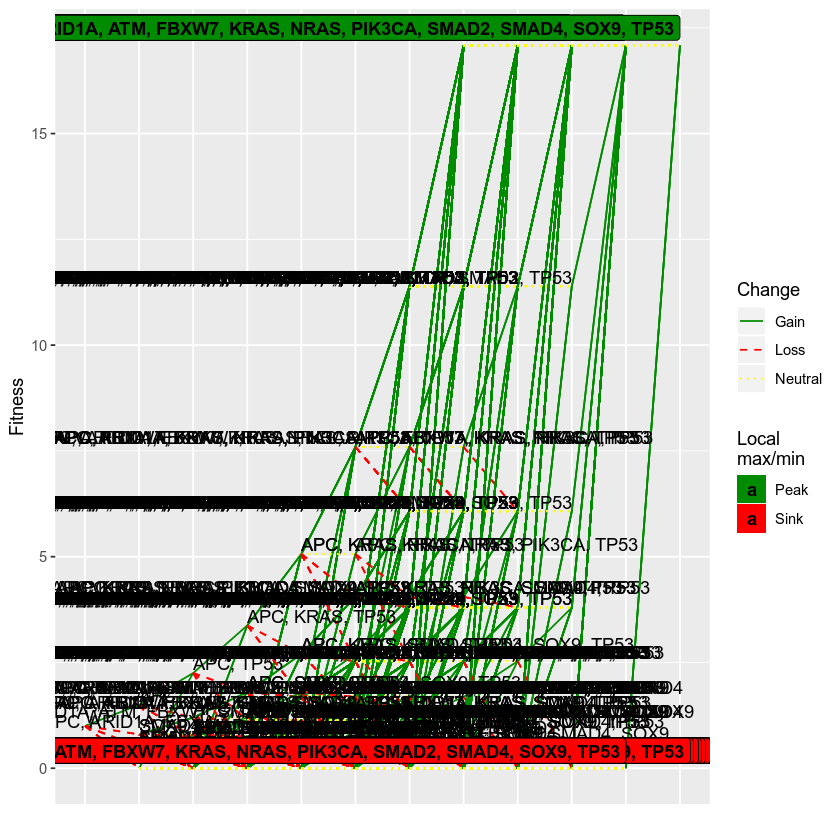

In [4]:
## Evaluation of all possible genotypes fitness 
## under the previous fitness specifications
COADREAD_FL <- evalAllGenotypes(COADREAD_fitness, max = 131072)

## Fitness landscape representation
plotFitnessLandscape(COADREAD_FL) 

## SImplified Model

In [2]:
## Restriction table, including five-modules DAG of
## restrictions specifications and associated fitness
COADREAD_rT_5d <- data.frame(parent = c("Root", "A", "B", "C"), # Parent nodes
                             child = c("A", "B", "C", "D"), # Child nodes
                             s = 0.5, 
                             sh = c(rep(-1, 4)),
                             typeDep = "MN")

## Create fitness specifications from simplified DAG of restrictions
COADREAD_fitness_5d <- allFitnessEffects(COADREAD_rT_5d,
                                         geneToModule = c( "Root" = "Root",
                                                           "A" = "APC",
                                                           "B" = "TP53",
                                                           "C" = "KRAS",
                                                           "D" = "PIK3CA, NRAS"),
                                         drvNames = c("APC", "TP53", "KRAS",
                                                      "PIK3CA", "NRAS"))

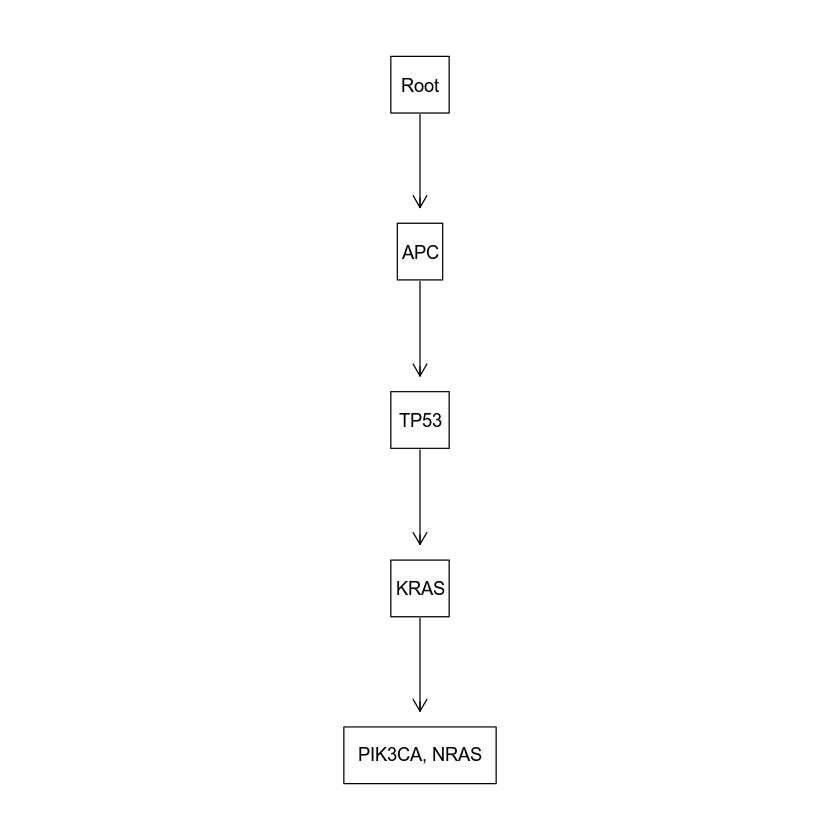

In [3]:
## Simplified DAG of restrictions representation
plot(COADREAD_fitness_5d, expandModules = TRUE, autofit = TRUE)

## Map Genotypes to Fitness

Warning message:
“ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps”

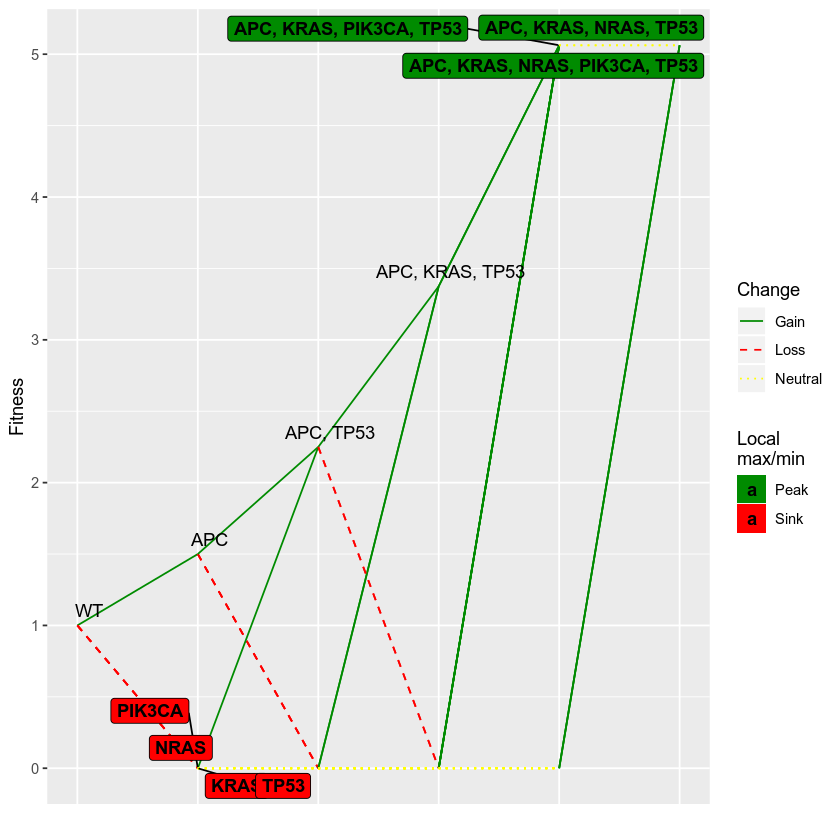

In [4]:
## Evaluation of all possible genotypes fitness under the previous fitness specifications
COADREAD_FL_5d <- evalAllGenotypes(COADREAD_fitness_5d)

## Fitness landscape representation
plotFitnessLandscape(COADREAD_FL_5d, use_ggrepel = TRUE) 

## Frequency-dependent fitness

Clones that coexist in a tumor can influence the fitness of each other in a frequency-dependent manner. APC, TP53, KRAS, PIK3CA, NRAS genotype fitness could depend on the frequency of APC, TP53, KRAS, PIK3CA and APC, TP53, KRAS, NRAS genotypes in the context of a competitive relationship among clones for niche nutrients. APC, TP53, KRAS, PIK3CA, NRAS clones would be more energetically demanding and thus, coexistence with other clones would be detrimental

In [ ]:
## Mapping of genotypes to frequency-dependent fitness
# Not explicitly mapped genotypes are assigned a fitness of cero
COADREAD_gen_freqdep <- data.frame(
                Genotype = c("WT", "APC","APC, TP53",
                            "APC, TP53, KRAS",
                            "APC, TP53, KRAS, PIK3CA",
                            "APC, TP53, KRAS, NRAS",
                            "APC, TP53, KRAS, PIK3CA, NRAS"),
                            Fitness = c("1", "1.5",
                                        "2.25", "3.375", "5.0625", "5.0625",
              "5.0625 - ((f_APC_TP53_KRAS_PIK3CA + f_APC_TP53_KRAS_NRAS))/2"),
                            stringsAsFactors = FALSE)

## Fitness specifications
COADREAD_fitness_freqdep <- allFitnessEffects(genotFitness = COADREAD_gen_freqdep, 
                                                   frequencyDependentFitness = TRUE,
                                                   frequencyType = "rel")

## Map Genotypes to Fitness

In [ ]:
## Evaluate all genotypes considering population sizes of the clones
COADREAD_FL_freqdep <- evalAllGenotypes(COADREAD_fitness_freqdep,
                                 spPopSizes = c("WT" = 5, "APC" = 5, "APC, TP53" = 5,
                                                "APC, TP53, KRAS" = 10,
                                                "APC, TP53, KRAS, PIK3CA" = 50,
                                                "APC, TP53, KRAS, NRAS" = 50,
                                                "APC, TP53, KRAS, PIK3CA, NRAS" = 50))
                                                   

## Fitness landscape representation
plotFitnessLandscape(COADREAD_FL_freqdep)

## References

* ds
* sdsfds

<div align="center"> 
    
# Thanks?